# Classify Song Genres from Audio Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')

In [3]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [5]:
echonest = pd.read_json('echonest-metrics.json', precise_float=True)

In [6]:
echonest.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [7]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [8]:
# merge two dataset, grab all echonest column, tracks only two columns(track_id, genre_top)
echo_tracks = pd.merge(echonest, tracks[['track_id', 'genre_top']], on='track_id')

echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [9]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [10]:
echo_tracks['genre_top'].value_counts()

genre_top
Rock       3892
Hip-Hop     910
Name: count, dtype: int64

In [11]:
echo_tracks_corr = echo_tracks.corr(numeric_only=True)
echo_tracks_corr.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [12]:
echo_tracks.drop('track_id', axis=1).describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [13]:
# X
features = echo_tracks.drop(['genre_top','track_id'], axis=1)

features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018


In [14]:
# y
label = echo_tracks['genre_top']
label.head()

0    Hip-Hop
1    Hip-Hop
2    Hip-Hop
3    Hip-Hop
4       Rock
Name: genre_top, dtype: object

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

pd.DataFrame(scaled_features).head()

,0,1,2,3,4,5,6,7
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,-1.204813,1.684139,0.312852,-1.602876,1.229828,0.135130,-0.777317,0.631077
3,-0.094655,0.417927,-0.265203,-1.553079,-0.607326,2.882707,-0.364657,1.652859
4,1.361706,-0.985896,1.453323,0.979975,-0.442757,-0.364157,-1.072003,-1.573102


In [16]:
category = echo_tracks.drop('track_id', axis=1)
category.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [17]:
category.shape

(4802, 9)

In [18]:
# Hip-Hop=0, Rock=1
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

labelencoder = LabelEncoder()

category['genre_top'] = labelencoder.fit_transform(category['genre_top'])

category.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,1


In [19]:
pd.DataFrame(category['genre_top']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   genre_top  4802 non-null   int64
dtypes: int64(1)
memory usage: 37.6 KB


In [20]:
sns.set(style='white')

cate_corr = category.corr(numeric_only=True)

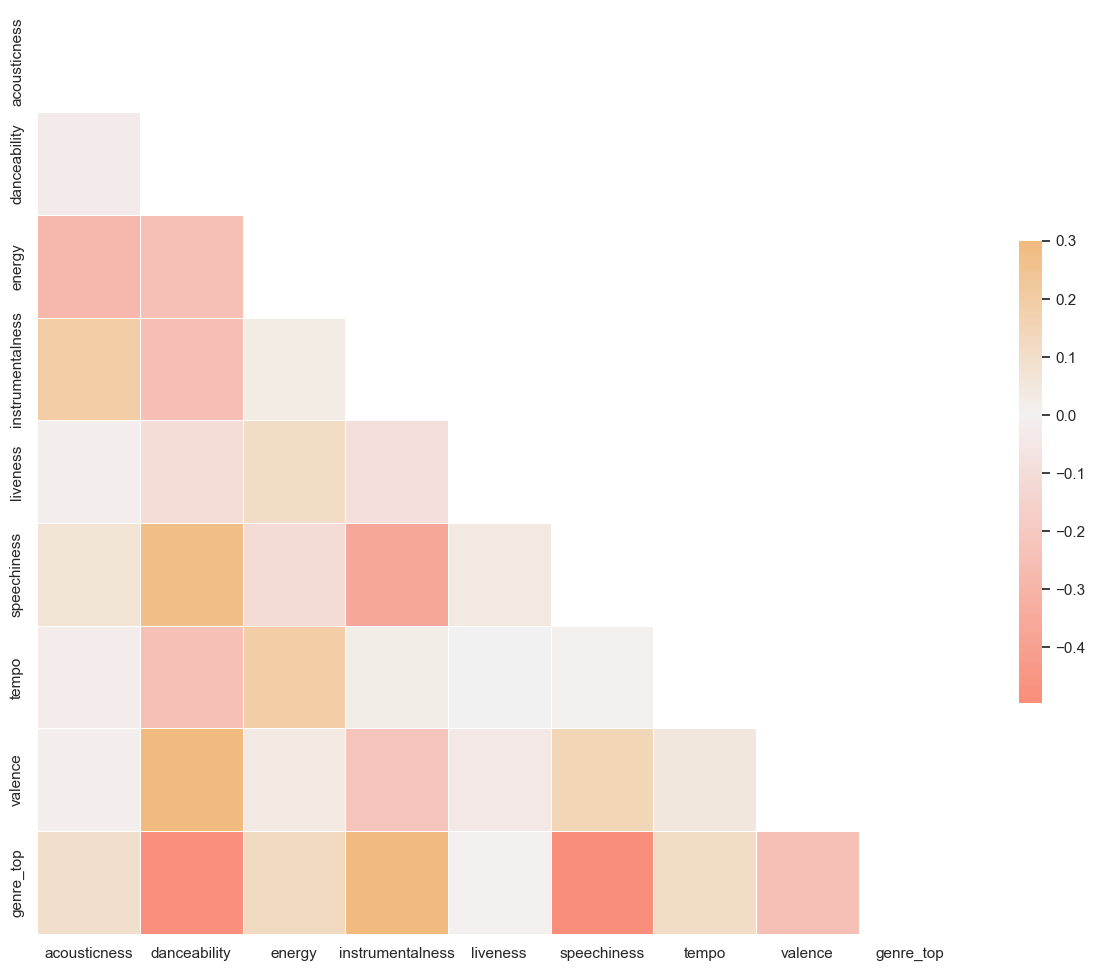

In [21]:
# np.bool defualt is False, will show the upper triangle
cover = np.zeros_like(cate_corr, dtype=bool)

# hide the triangle
cover[np.triu_indices_from(cover)] = True

f, ax = plt.subplots(figsize=(15,12))

cmap = sns.diverging_palette(20, 40, s=90, l=70, as_cmap=True)

sns.heatmap(cate_corr, mask=cover, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.show()

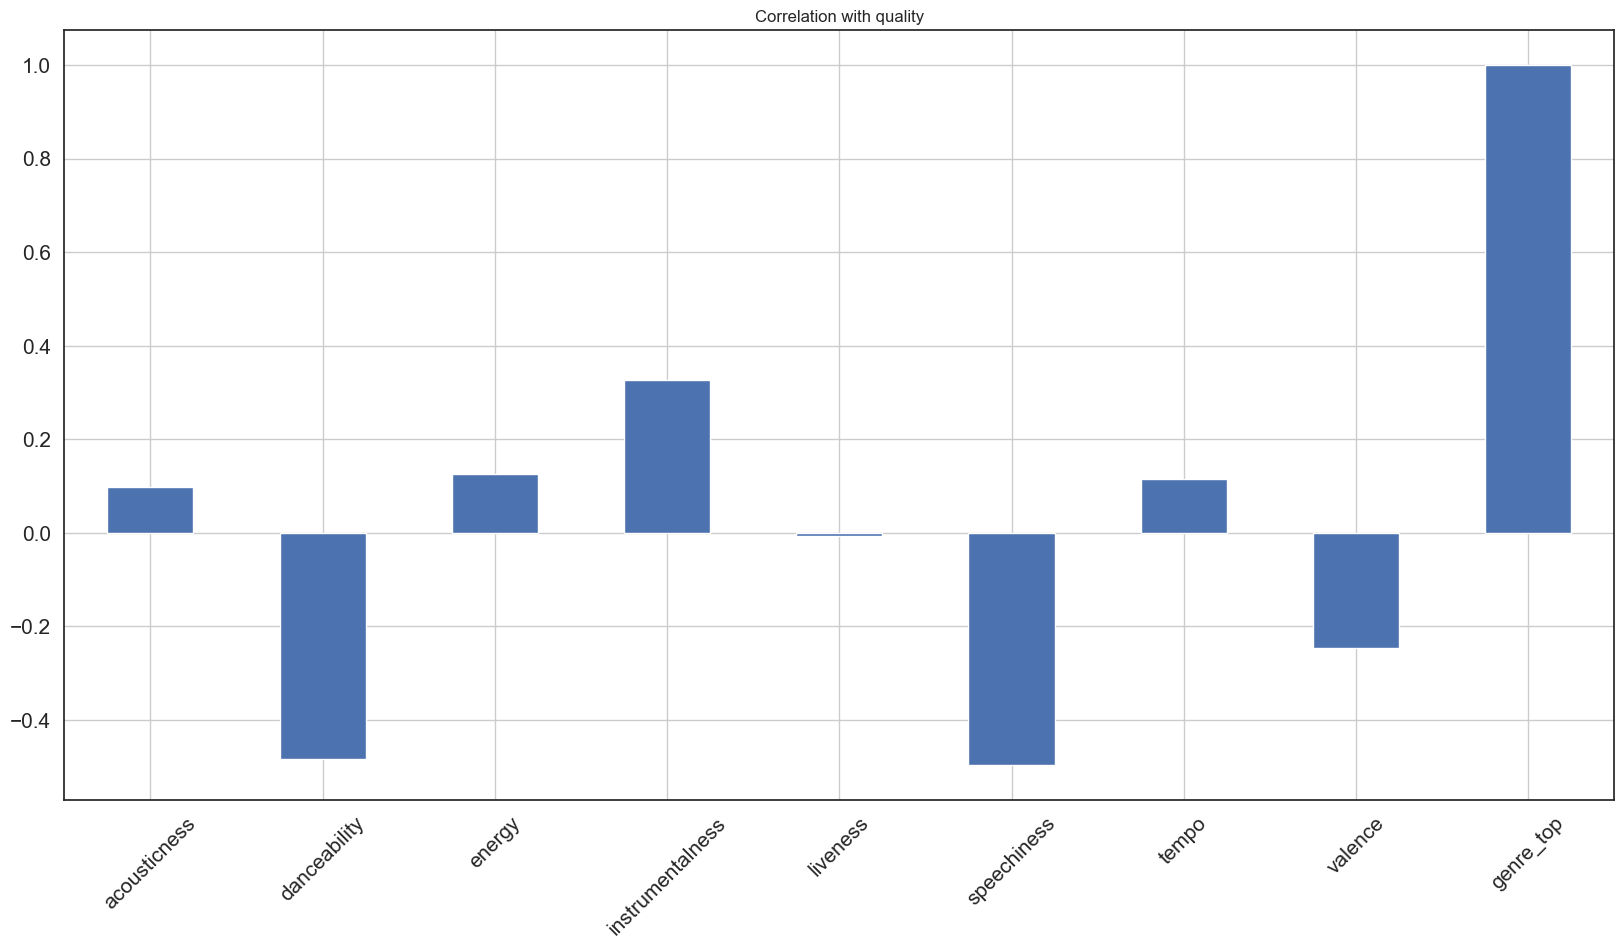

In [22]:
category.corrwith(category['genre_top']).plot.bar(figsize=(20,10), title='Correlation with quality',
                                                  rot=45, fontsize=15, grid=True)
plt.show()

In [23]:
X = category.drop('genre_top', axis=1)

y = category['genre_top']

In [24]:
category.shape

(4802, 9)

In [25]:
features_label = category.columns[:9]
features_label

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence', 'genre_top'],
      dtype='object')

Feature ranking:
 1. speechiness                    0.29174551404083987
 2. danceability                   0.20147359313087143
 3. tempo                          0.10825863636650339
 4. instrumentalness               0.10098410037218492
 5. acousticness                   0.0873171942876602
 6. energy                         0.08305653797649644
 7. valence                        0.07897926878318628
 8. liveness                       0.04818515504225747


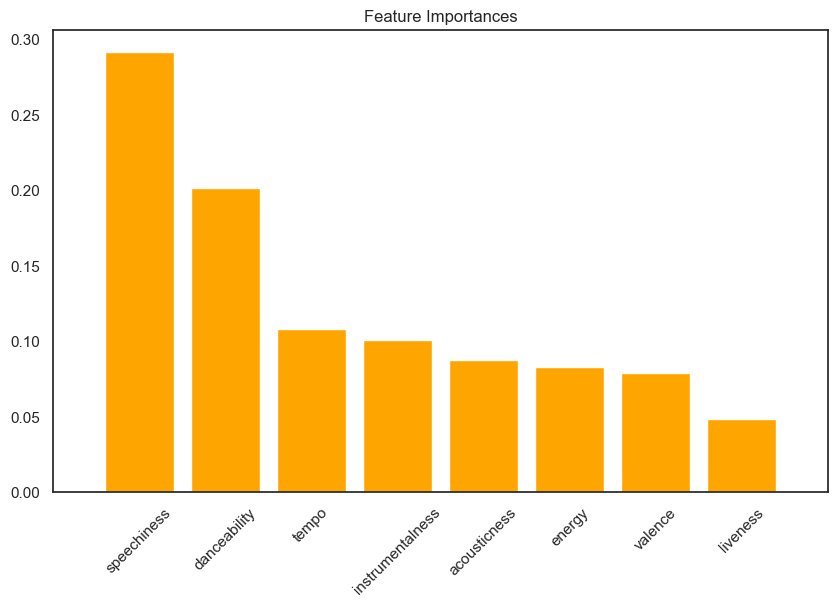

In [26]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)

classifier.fit(X, y)

importances = classifier.feature_importances_

# 反轉順序 等於從大到小
indices = np.argsort(importances)[::-1]

print('Feature ranking:')
for f in range(X.shape[1]):
    print(f"{f + 1:2d}. {features_label[indices[f]]:30} {importances[indices[f]]}")

    
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(features.shape[1]), importances[indices], color='orange', align='center')
plt.xticks(range(features.shape[1]), [features_label[i] for i in indices], rotation=45)
plt.xlim([-1, features.shape[1]])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
sc = StandardScaler()

# 為了保持原始特徵的列名 要重新轉回DataFrame, Standardize後會返回 np.array
X_train_df = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

X_test_df = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = X_train_df
X_test = X_test_df

In [30]:
# Using PCA reduce the dimension
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

print(pd.DataFrame(explained_variance))

          0
0  0.242947
1  0.180200
2  0.137930
3  0.128508
4  0.110334
5  0.083208
6  0.069667
7  0.047205


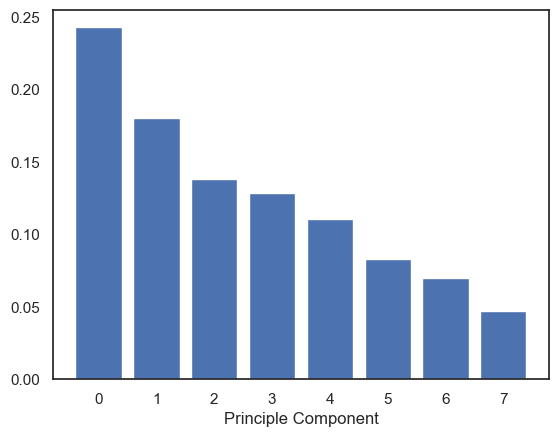

In [31]:
fig, ax = plt.subplots()

ax.bar(range(8), explained_variance)
ax.set_xlabel('Principle Component')
plt.show()

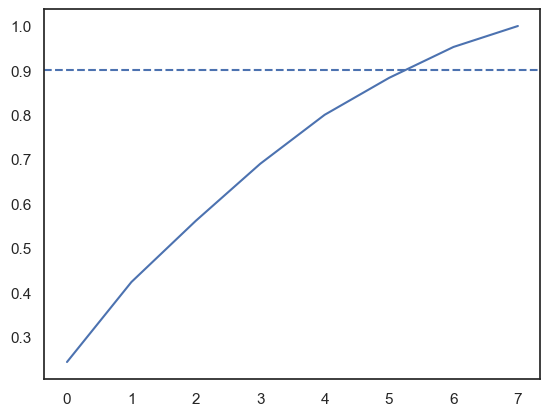

In [32]:
cumsum_exp = np.cumsum(explained_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(8), cumsum_exp)
ax.axhline(y=0.9, linestyle='--')

# [0]=True, [0]+1 index from 0
n_components = np.where(cumsum_exp > 0.9)[0][0]+1

pca = PCA(n_components, random_state=0)
pca_project = pca.fit_transform(features)

## Model Building

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [34]:
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1500, random_state=42, n_jobs=-1)),
    ("KNN", KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
    ('SVC', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs=-1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42, n_jobs=-1))
]

In [35]:
from sklearn.model_selection import StratifiedKFold, cross_validate,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [36]:
results = []
mean_test_accuracy_scores = []
cross_val_errors = []
classifier_names = []

for model_name, model in classifiers:
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    cv_results = cross_validate(model, X_train_pca, y_train, cv=cv, scoring='accuracy', n_jobs=-1,
                               return_train_score=True)
    
    cross_val_error = 1 - np.mean(cv_results['test_score'])
    
    results.append({'Model Name': model_name,
                    'Mean Train Accuracy': np.mean(cv_results['train_score']),
                    'Mean Test Accuracy': np.mean(cv_results['test_score']),
                    'Cross-Validation Errors': cross_val_error})
    
    mean_test_accuracy_scores.append(np.mean(cv_results['test_score']))
    cross_val_errors.append(cross_val_error)
    classifier_names.append(model_name)
    
result_df = pd.DataFrame(results)

display(result_df)

,Model Name,Mean Train Accuracy,Mean Test Accuracy,Cross-Validation Errors
0,Logistic Regression,0.896511,0.895861,0.104139
1,KNN,0.932635,0.911741,0.088259
2,SVC,0.934783,0.921638,0.078362
3,Decision Tree,1.000000,0.875553,0.124447
4,Random Forest,1.000000,0.914348,0.085652
5,AdaBoost,0.911351,0.894818,0.105182
6,XGBoost,1.000000,0.916691,0.083309


In [37]:
from sklearn.model_selection import GridSearchCV

## SVC

In [38]:
# svc = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)

# param_grid = {'C':[0.1,1,100,1000]}

# grid_search = GridSearchCV(svc, param_grid, cv=5)

# grid_search.fit(X_train_pca, y_train)
# print('Best Parameters:', grid_search.best_params_)

# Best Parameters: {'C': 1}

              precision    recall  f1-score   support

           0       0.82      0.68      0.75       183
           1       0.93      0.97      0.95       778

    accuracy                           0.91       961
   macro avg       0.88      0.82      0.85       961
weighted avg       0.91      0.91      0.91       961



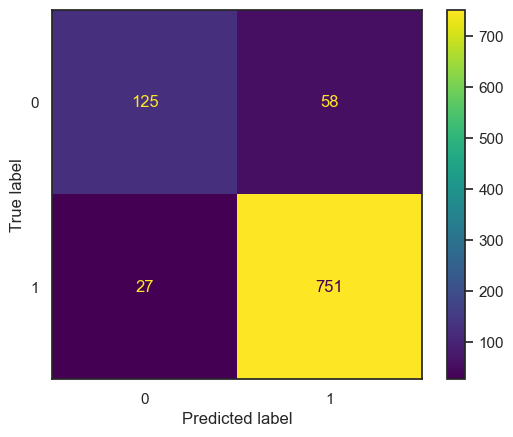

In [39]:
svc = SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=42)

svc.fit(X_train_pca, y_train)

prediction = svc.predict(X_test_pca)

print(classification_report(y_test, prediction))
cm = confusion_matrix(y_test, prediction, labels=svc.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

display.plot()
plt.show()

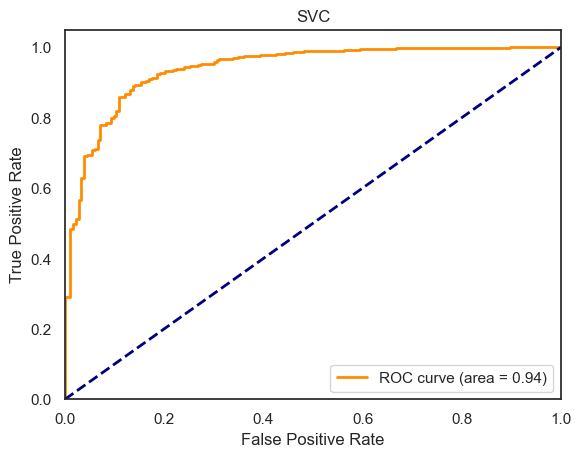

AUC: 0.94


In [40]:
y_pred_proba = svc.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.2f}')

## Logistic Regression

In [41]:
# lgr = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42)

# param_grid = {'C':[0.1,1,10,100],
           #   'max_iter':[100,200,300,400,500]}

# grid_search = GridSearchCV(lgr, param_grid=param_grid, cv=5)

# grid_search.fit(X_train_pca, y_train)

# print('Best Params:', grid_search.best_params_)

# Best Params: {'C': 1, 'max_iter': 100}

              precision    recall  f1-score   support

           0       0.73      0.58      0.65       183
           1       0.91      0.95      0.93       778

    accuracy                           0.88       961
   macro avg       0.82      0.77      0.79       961
weighted avg       0.87      0.88      0.87       961



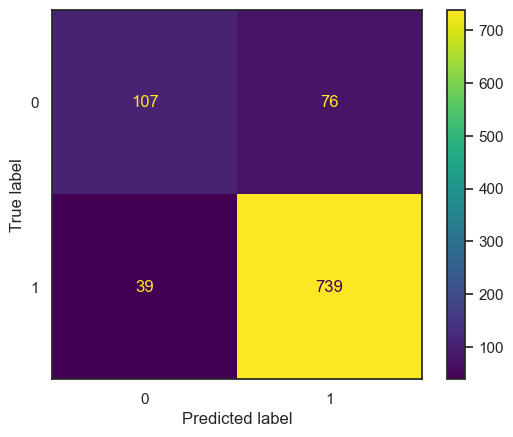

In [42]:
lgr = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='lbfgs', random_state=42)

lgr.fit(X_train_pca, y_train)

prediction = lgr.predict(X_test_pca)

print(classification_report(y_test, prediction))

cm = confusion_matrix(y_test, prediction, labels=lgr.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgr.classes_)

display.plot()
plt.show()

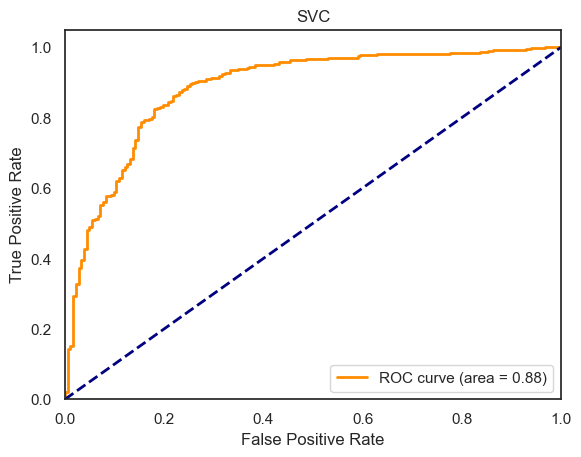

AUC: 0.88


In [43]:
y_pred_proba = lgr.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.2f}')

## KNN

In [44]:
# knn = KNeighborsClassifier()

# param_grid = {'n_neighbors':range(3,11), 'weights':['uniform', 'distance'],
           #   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}

# grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

# grid_search.fit(X_train_pca, y_train)

# print('Best Params:', grid_search.best_params_)

# Best Params: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

              precision    recall  f1-score   support

           0       0.79      0.63      0.71       183
           1       0.92      0.96      0.94       778

    accuracy                           0.90       961
   macro avg       0.86      0.80      0.82       961
weighted avg       0.89      0.90      0.89       961



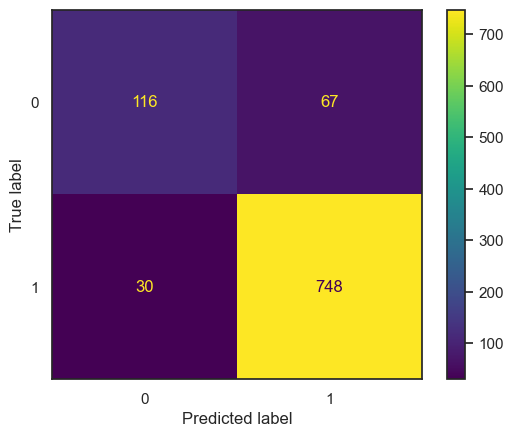

In [45]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='auto', p=1)
knn.fit(X_train_pca, y_train)

prediction = knn.predict(X_test_pca)
print(classification_report(y_test, prediction))

cm=confusion_matrix(y_test, prediction, labels=knn.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
display.plot()
plt.show()

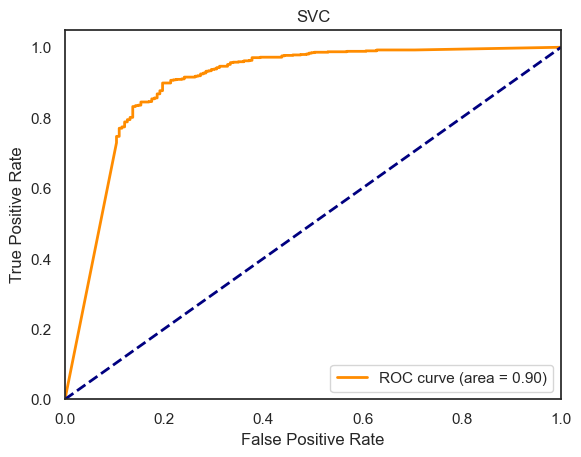

AUC: 0.90


In [46]:
y_pred_proba = knn.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.2f}')

## AdaBoost

In [47]:
# adaboost = AdaBoostClassifier(random_state=42)

# param_grid = {'n_estimators':[50,100,200,300,400,500], 'learning_rate':[0.01,0.1,1]}

# grid_search = GridSearchCV(adaboost, param_grid=param_grid, cv=5)

# grid_search.fit(X_train_pca, y_train)

# print('Best Params:', grid_search.best_params_)

# Best Params: {'learning_rate': 0.1, 'n_estimators': 500}

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       183
           1       0.91      0.96      0.93       778

    accuracy                           0.89       961
   macro avg       0.83      0.78      0.80       961
weighted avg       0.88      0.89      0.88       961



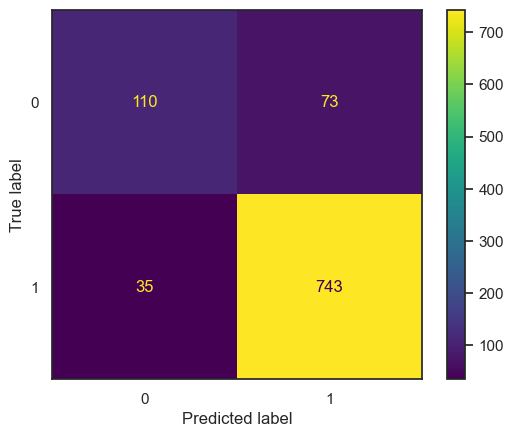

In [48]:
adaboost = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=42)

adaboost.fit(X_train_pca, y_train)

prediction = adaboost.predict(X_test_pca)

print(classification_report(y_test, prediction))

cm = confusion_matrix(y_test, prediction, labels=adaboost.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)

display.plot()
plt.show()

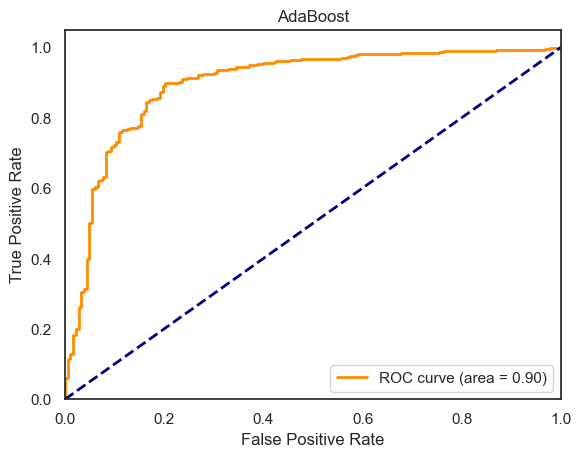

AUC: 0.90


In [49]:
y_pred_proba = adaboost.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.2f}')